Exercice 1 : Découverte de l'environnement
---

In [4]:
import numpy as np
import random

* **Téléchargement de l'environnement**

In [5]:
from env_traffic import TrafficEnvironment

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [8 1 2 5] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [8 1 2 4]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [10  3  0  1]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 3:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [10  2  1  1]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 4:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [6 0 3 3]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 1 4 5]
  🎯 Reward (Cars Passed): 4
------------

* **Importation et exécution de l'environnement**

In [6]:
env = TrafficEnvironment()
state = env.reset()

In [7]:
for _ in range(10) :
    action = 0
    next_state, reward = env.step(action)
    print(f"Etat : {next_state}, Récompense : {reward}")

Etat : [ 3  3 10  5], Récompense : 5
Etat : [ 2  1 11  6], Récompense : 5
Etat : [ 0  0 13  8], Récompense : 3
Etat : [ 0  0 15  8], Récompense : 0
Etat : [ 2  2 15 10], Récompense : 0
Etat : [ 1  1 15 10], Récompense : 3
Etat : [ 2  2 15 12], Récompense : 2
Etat : [ 1  0 15 14], Récompense : 3
Etat : [ 1  1 15 15], Récompense : 1
Etat : [ 1  2 17 17], Récompense : 2


Exercice 2 : Implémentation de Q-Learning
---

In [8]:
q_table = np.zeros((10, 10, 10, 10, 2))

In [25]:
import numpy as np

def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, max_steps=1000):
    num_states = 10
    num_actions = 2

    q_table = np.zeros((num_states, num_actions))
    rewards_list = []

    for episode in range(episodes):
        print(f"\nÉpisode {episode + 1}/{episodes}")
        state = env.reset()

        if isinstance(state, (list, np.ndarray)):
            state = state[0]
        state = int(state)

        done = False
        step_count = 0
        total_reward = 0

        while not done and step_count < max_steps:
            if np.random.rand() < epsilon:
                action = np.random.choice(num_actions)
            else:
                action = np.argmax(q_table[state])

            step_result = env.step(action)

            if len(step_result) == 2:
                next_state, reward = step_result
                done = (step_count >= max_steps - 1)
            else:
                next_state, reward, done, _ = step_result

            if isinstance(next_state, (list, np.ndarray)):
                next_state = next_state[0]

            next_state = np.clip(int(next_state), 0, num_states - 1)

            best_next_action = np.argmax(q_table[next_state])
            q_table[state, action] += alpha * (reward + gamma * q_table[next_state, best_next_action] - q_table[state, action])

            total_reward += reward
            state = next_state
            step_count += 1

        rewards_list.append(total_reward)
        epsilon *= decay

    return q_table, rewards_list



In [26]:
q_table, rewards = train_q_learning(env)


Épisode 1/1000

Épisode 2/1000

Épisode 3/1000

Épisode 4/1000

Épisode 5/1000

Épisode 6/1000

Épisode 7/1000

Épisode 8/1000

Épisode 9/1000

Épisode 10/1000

Épisode 11/1000

Épisode 12/1000

Épisode 13/1000

Épisode 14/1000

Épisode 15/1000

Épisode 16/1000

Épisode 17/1000

Épisode 18/1000

Épisode 19/1000

Épisode 20/1000

Épisode 21/1000

Épisode 22/1000

Épisode 23/1000

Épisode 24/1000

Épisode 25/1000

Épisode 26/1000

Épisode 27/1000

Épisode 28/1000

Épisode 29/1000

Épisode 30/1000

Épisode 31/1000

Épisode 32/1000

Épisode 33/1000

Épisode 34/1000

Épisode 35/1000

Épisode 36/1000

Épisode 37/1000

Épisode 38/1000

Épisode 39/1000

Épisode 40/1000

Épisode 41/1000

Épisode 42/1000

Épisode 43/1000

Épisode 44/1000

Épisode 45/1000

Épisode 46/1000

Épisode 47/1000

Épisode 48/1000

Épisode 49/1000

Épisode 50/1000

Épisode 51/1000

Épisode 52/1000

Épisode 53/1000

Épisode 54/1000

Épisode 55/1000

Épisode 56/1000

Épisode 57/1000

Épisode 58/1000

Épisode 59/1000

Épiso

Ecercice 3 : Implémentation de SARSA
---

In [30]:
import numpy as np

def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, max_steps=1000):
    num_states = 10
    num_actions = 2

    q_table = np.zeros((num_states, num_actions))
    rewards_list = []

    for episode in range(episodes):
        print(f"\nÉpisode {episode + 1}/{episodes}")
        state = env.reset()

        if isinstance(state, (list, np.ndarray)):
            state = state[0]
        state = int(state)

        done = False
        step_count = 0
        total_reward = 0

        action = np.random.choice(num_actions) if np.random.rand() < epsilon else np.argmax(q_table[state])

        while not done and step_count < max_steps:
            step_result = env.step(action)

            if len(step_result) == 2:
                next_state, reward = step_result
                done = (step_count >= max_steps - 1)
            else:
                next_state, reward, done, _ = step_result

            if isinstance(next_state, (list, np.ndarray)):
                next_state = next_state[0]

            next_state = np.clip(int(next_state), 0, num_states - 1)

            next_action = np.random.choice(num_actions) if np.random.rand() < epsilon else np.argmax(q_table[next_state])

            q_table[state, action] += alpha * (reward + gamma * q_table[next_state, next_action] - q_table[state, action])

            total_reward += reward
            state, action = next_state, next_action
            step_count += 1

        rewards_list.append(total_reward)
        epsilon *= decay

    return q_table, rewards_list



In [33]:
q_table_sarsa, rewards_sarsa = train_sarsa(env)


Épisode 1/1000

Épisode 2/1000

Épisode 3/1000

Épisode 4/1000

Épisode 5/1000

Épisode 6/1000

Épisode 7/1000

Épisode 8/1000

Épisode 9/1000

Épisode 10/1000

Épisode 11/1000

Épisode 12/1000

Épisode 13/1000

Épisode 14/1000

Épisode 15/1000

Épisode 16/1000

Épisode 17/1000

Épisode 18/1000

Épisode 19/1000

Épisode 20/1000

Épisode 21/1000

Épisode 22/1000

Épisode 23/1000

Épisode 24/1000

Épisode 25/1000

Épisode 26/1000

Épisode 27/1000

Épisode 28/1000

Épisode 29/1000

Épisode 30/1000

Épisode 31/1000

Épisode 32/1000

Épisode 33/1000

Épisode 34/1000

Épisode 35/1000

Épisode 36/1000

Épisode 37/1000

Épisode 38/1000

Épisode 39/1000

Épisode 40/1000

Épisode 41/1000

Épisode 42/1000

Épisode 43/1000

Épisode 44/1000

Épisode 45/1000

Épisode 46/1000

Épisode 47/1000

Épisode 48/1000

Épisode 49/1000

Épisode 50/1000

Épisode 51/1000

Épisode 52/1000

Épisode 53/1000

Épisode 54/1000

Épisode 55/1000

Épisode 56/1000

Épisode 57/1000

Épisode 58/1000

Épisode 59/1000

Épiso

Exercice 4 : Analyse et Visualisation des Résultats
---

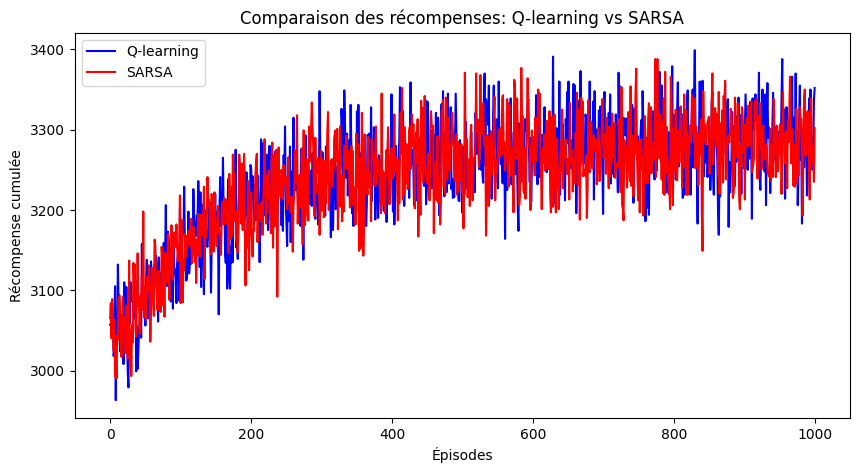

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rewards, label="Q-learning", color='b')
plt.plot(rewards_sarsa, label="SARSA", color='r')
plt.xlabel('Épisodes')
plt.ylabel('Récompense cumulée')
plt.title('Comparaison des récompenses: Q-learning vs SARSA')
plt.legend()
plt.show()
